# The Movies Dataset

(Last Updated: 21/11/2024)

---

# <center> PHẦN 1. KHÁM PHÁ DỮ LIỆU & ĐẶT CÂU HỎI

# Tổng quan về tiền xử lý dữ liệu
## Mục tiêu chính:
## A. Làm sạch dữ liệu (Exploratory Data Analysis - EDA):
1. Khám phá dữ liệu: Đưa ra những đánh giá đầu tiên về dữ liệu để hiểu cấu trúc và ý nghĩa của chúng.
Trước khi xử lý, chúng ta cần hiểu rõ cấu trúc và nội dung của dữ liệu. Các hoạt động bao gồm:
+ Kiểm tra số lượng dòng, cột.
Xác định kiểu dữ liệu của từng cột (số, phân loại, ngày tháng, ...).
+ Kiểm tra tỷ lệ dữ liệu bị thiếu, các giá trị bất thường.
+ Tóm tắt các thống kê cơ bản như trung bình, giá trị nhỏ nhất/lớn nhất, phương sai, ...

2. Xử lý dữ liệu thiếu  (Handling Missing Data):
Dữ liệu thiếu thường gây sai lệch trong phân tích. Chúng ta sẽ điền giá trị bị thiếu bằng các phương pháp như:
+ Giá trị trung bình/median.
+ Thuật toán Machine Learning. Ae chú ý là cần áp dụng đúng model, ví dụ như đối với kiểu dữ liệu là Category (phân lớp) thì nên sử dụng KNN, hoặc int64 (Liên tục) thì xài Linear Regression,....
+ Hoặc loại bỏ các dòng/cột chứa quá nhiều giá trị bị thiếu nếu cần thiết.

3. Xử lý dữ liệu nhiễu: Loại bỏ các giá trị bất thường (outliers) để đảm bảo dữ liệu sạch (Sử dụng  phương pháp như IQR (Interquartile Range) để phát hiện và loại bỏ những giá trị nằm ngoài phạm vi hợp lý.)

4. Chuẩn hóa kiểu dữ liệu:
- Chuyển đổi dữ liệu về đúng kiểu cần thiết (ví dụ: chuyển đổi ngày tháng, số nguyên, số thực).
- Mã hóa dữ liệu phân loại (categorical data) thành dạng số, phù hợp với mô hình (Label Encoding hoặc One-hot Encoding). (nếu cảm thấy cần thiết)
P/s: Thứ tự các bước trên có thể thay đổi, tùy theo ae thiết kế


## B. Giảm chiều dữ liệu(Dimensionality Reduction): Giảm độ phức tạp
1.Khám phá dữ liệu (Tiếp theo):
- Trực quan hóa mối quan hệ giữa các biến để xác định những biến dư thừa, không cần thiết.
- Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

## C. Chuẩn hóa dữ liệu  
- Min-Max Scaling: Đưa dữ liệu về khoảng [0, 1].
- Z-score Standardization: Chuẩn hóa dữ liệu thành phân phối chuẩn với trung bình bằng 0 và phương sai bằng 1.
- Robust Scaling: Loại bỏ tác động của các giá trị ngoại lai khi chuẩn hóa.
- Decimal Scaling: Chia giá trị cho lũy thừa của 10 để thu hẹp giá trị dữ liệu.

## D. Rời rạc hóa dữ liệu  

## E. Lưu dữ liệu sạch: Dữ liệu sau khi tiền xử lý sẽ được lưu lại để sử dụng trong các giai đoạn phân tích tiếp theo.

# Import các thư viện cần thiết


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# **A.1. Khám phá dữ liệu**

### **Đọc file dữ liệu ban đầu chưa xử lí từ raw_data cho file movies_metadata.csv**

In [2]:
raw_movies_metadata = pd.read_csv('./Data/raw_data/movies_metadata.csv', delimiter=',', low_memory=False)
raw_movies_metadata.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


### **Dữ liệu có bao nhiêu hàng, bao nhiêu cột?**



- **movies_metadata.csv**

In [3]:
num_rows_metadata, num_cols_metadata = raw_movies_metadata.shape
print(f'Số dòng: {num_rows_metadata}')
print(f'Số cột: {num_cols_metadata}')

Số dòng: 45463
Số cột: 24


### **Dữ liệu các dòng có bị lặp không?**

- **movies_metadata.csv**

In [4]:
duplicates_metadata = raw_movies_metadata.duplicated()
print(f"Số dòng bị lặp: {duplicates_metadata.sum()}")

Số dòng bị lặp: 17


### **Ý nghĩa của các cột dữ liệu**

- **movies_metadata.csv**
1. **`adult`**: Indicates if the movie is classified as adult content (True/False).
2. **`belongs_to_collection`**: JSON-style data indicating if the movie is part of a collection or series.
3. **`budget`**: The movie's production budget in dollars.
4. **`genres`**: A JSON-formatted string listing the genres of the movie.
5. **`homepage`**: URL of the movie's official website (if available).
6. **`id`**: Unique ID for the movie within the dataset.
7. **`imdb_id`**: IMDb ID for cross-referencing with IMDb data.
8. **`original_language`**: The primary language of the movie (e.g., "en" for English).
9. **`original_title`**: The original title of the movie.
10. **`overview`**: A brief summary or synopsis of the movie.
11. **`popularity`**: A numerical score indicating the movie's popularity.
12. **`poster_path`**: Path to the movie's poster image on TMDb.
13. **`production_companies`**: JSON data listing the production companies involved.
14. **`production_countries`**: JSON data listing the countries where the movie was produced.
15. **`release_date`**: The release date of the movie.
16. **`revenue`**: Box office revenue in dollars.
17. **`runtime`**: The duration of the movie in minutes.
18. **`spoken_languages`**: JSON data listing languages spoken in the movie.
19. **`status`**: The status of the movie (e.g., "Released").
20. **`tagline`**: The tagline or promotional line associated with the movie.
21. **`title`**: The title of the movie in the dataset.
22. **`video`**: Indicates if there is an associated video (True/False).
23. **`vote_average`**: The average rating the movie received.
24. **`vote_count`**: The number of votes the movie received.

### **Kiểu dữ liệu của các cột**

- **movies_metadata.csv**

In [5]:
dtypes_metadata = raw_movies_metadata.dtypes
dtypes_metadata

adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count                 int64
dtype: object

**Xử lí các dòng bị lỗi dữ liệu do website**

### **Tóm tắt các thống kê cơ bản như trung bình, giá trị nhỏ nhất/lớn nhất, phương sai**

**Tiếp theo, ta sẽ xem xét sự phân bố của dữ liệu trong các cột dữ liệu dạng số thực này.**

Đối với các cột có kiểu dữ liệu số, ta sẽ tính toán các giá trị sau:
- Tỷ lệ phần trăm (từ 0 đến 100) của các giá trị thiếu
- Giá trị nhỏ nhất (min)
- Tứ phân vị thứ nhất (lower quartile)
- Trung vị (median)
- Tứ phân vị thứ ba (upper quartile)
- Giá trị lớn nhất (max)

In [6]:
numeric_cols_df = raw_match_statistics.select_dtypes(include=['int64'])

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_match_statistics_col_info_df = numeric_cols_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_match_statistics_col_info_df

NameError: name 'raw_match_statistics' is not defined

# **A.2.Xử lý dữ liệu thiếu**

### **Đầu tiên, xem lại tỉ lệ dữ liệu bị thiếu của các cột**


In [ ]:

dict(num_match_statistics_col_info_df.iloc[0])

{'home_total_shots': 0.0,
 'home_shots_off_target': 0.0,
 'home_shots_saved': 0.0,
 'home_corners': 0.0,
 'home_free_kicks': 0.0,
 'home_offsides': 0.0,
 'home_fouls': 0.0,
 'away_total_shots': 0.0,
 'away_shots_off_target': 0.0,
 'away_shots_saved': 0.0,
 'away_corners': 0.0,
 'away_free_kicks': 0.0,
 'away_offsides': 0.0,
 'away_fouls': 0.0,
 'home_yellow_cards': 0.0,
 'home_red_cards': 0.0,
 'away_yellow_cards': 0.0,
 'away_red_cards': 0.0}

### **Nhận xét về tỉ lệ dữ liệu bị thiếu của các cột**

Dựa trên bảng thống kê `num_match_statistics_col_info_df`, ta có thể nhận thấy rằng tất cả các cột dữ liệu đều không có giá trị bị thiếu (`missing_ratio` là 0.0 cho tất cả các cột). Điều này cho thấy dữ liệu đã được làm sạch và không có bất kỳ giá trị nào bị thiếu trong các cột dữ liệu hiện tại. Việc không có dữ liệu bị thiếu giúp đảm bảo tính toàn vẹn và độ tin cậy của các phân tích tiếp theo.


### **Kiểm tra lại phân bố của dữ liệu sau khi đã xóa đi những dữ liệu bị thiếu do lỗi của website**

In [ ]:
raw_match_statistics.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,home_total_shots,home_shots_off_target,home_shots_saved,home_corners,home_free_kicks,home_offsides,home_fouls,away_total_shots,away_shots_off_target,away_shots_saved,away_corners,away_free_kicks,away_offsides,away_fouls,home_yellow_cards,home_red_cards,away_yellow_cards,away_red_cards
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,4.0,3.0,1.0,3.0,9.0,8.0,1.0,3.0,2.0,2.0,3.0,9.0,8.0,1.0,1.0,0.0,1.0,0.0
median,7.0,5.0,2.0,5.0,11.0,10.0,2.0,6.0,4.0,3.0,4.0,11.0,11.0,1.0,1.0,0.0,2.0,0.0
upper_quartile,13.0,7.0,4.0,8.0,14.0,13.0,3.0,10.0,6.0,4.0,6.0,14.0,13.0,3.0,2.0,0.0,3.0,0.0
max,37.0,18.0,12.0,19.0,28.0,255.0,10.0,31.0,14.0,15.0,15.0,28.0,255.0,10.0,6.0,2.0,9.0,2.0


# **B. Giảm độ phức tập của dữ liệu**

**Đầu tiên, ta sẽ xem xét sự ảnh hưởng lẫn nhau của các cột dữ liệu bằng ma trận tương quan**

In [ ]:
correlation_matrix = raw_match_statistics.select_dtypes(exclude='object').corr()

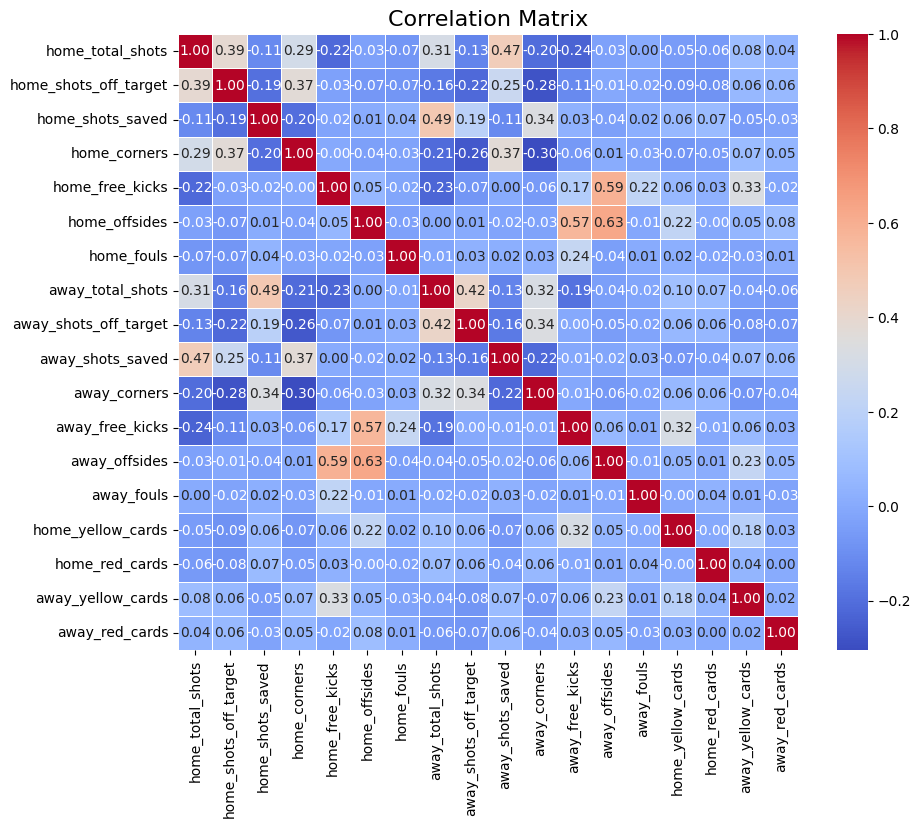

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

**Nhận xét**

- Dựa vào ma trận tương quan, có thể thấy rằng tất cả các biến đều thể hiện ý nghĩa quan trọng riêng trong việc phân tích dữ liệu trận đấu.
- Một số biến có mối tương quan cao (gần bằng 1 hoặc -1) như `home_total_shots` và `home_shots_off_target` hoặc `away_offsides` và `away_free_kicks`. Tuy nhiên, do mỗi biến đại diện cho một khía cạnh cụ thể của trận đấu, chúng đều mang giá trị trong bối cảnh nghiên cứu.
- Các biến như `home_red_cards` hoặc `away_red_cards` có tương quan thấp với hầu hết các biến khác, nhưng đây là các sự kiện hiếm gặp và có thể thay đổi kết quả trận đấu.

**Nhóm em quyết định giữ tất cả các cột trong tập dữ liệu trừ 6 cột là home_red_cards, home_yellow_cards, away_red_cards, away_yellow_cards, home_shots_off_target và away_shots_off_target này vì những lí do sau:**

1. **Ý nghĩa độc lập của các biến:**
   - Mỗi biến đại diện cho một khía cạnh cụ thể trong trận đấu, như số thẻ, số lần phạt góc, số pha phạm lỗi, v.v.
   - Ngay cả các biến có tương quan thấp vẫn mang ý nghĩa quan trọng trong việc phân tích chiến thuật và kết quả.

2. **Không làm mất thông tin quan trọng:**
   - Loại bỏ biến nào đó có thể dẫn đến việc mất mát thông tin quan trọng về các yếu tố ảnh hưởng đến kết quả trận đấu.
   - Việc giữ lại tất cả các biến giúp đảm bảo dữ liệu toàn diện hơn và thuận lợi hơn khi xây dựng mô hình phân tích hoặc dự đoán.

3. **Phân tích toàn diện hơn:**
   - Các sự kiện như `red_cards` hoặc `yellow_cards` tuy không thường xuyên xảy ra nhưng lại có tác động lớn đến cục diện trận đấu. Tuy nhiên thì tụi em sẽ quyết định gộp lại thành 2 nhóm cột là `home_cards`, `away_cards` để giảm độ phức tạp của dữ liệu. Công thức để tính toán `home_cards` = 2 * `home_red_cards` + `home_yellow_cards` và `away_cards` = 2 * `away_red_cards` + `away_yellow_cards`.
   - Tương tự, các biến có mối tương quan cao nhưng không hoàn toàn giống nhau (vd: `home_total_shots` và `home_shots_off_target`) đều cung cấp thông tin bổ sung có giá trị nhưng có lẽ `home_shots_off_target` và `away_shots_off_target` không cần thiết cho mục tiêu nghiên cứu của tụi em.

**Kết luận**

- Dựa trên phân tích, nhóm quyết định **chỉ thay đổi 6 biến như trên trong đó tụi em sẽ xóa đi 2 biến là `home_shots_off_target` và `away_shots_off_target` cùng với đó là gộp các cột red_cards,yellow_cards thành `home_cards` và `away_cards`** trong tập dữ liệu vì ý nghĩa đặc thù của mỗi biến và mục tiêu nghiên cứu hướng đến sự toàn diện trong việc hiểu rõ các yếu tố ảnh hưởng đến trận đấu. Tuy nhiên, nhóm sẽ giữ lại 2 biến mới này để sử dụng trong các bước tiếp theo.


In [ ]:
raw_match_statistics['home_cards'] = 2 * raw_match_statistics['home_red_cards'] + raw_match_statistics['home_yellow_cards']
raw_match_statistics['away_cards'] = 2 * raw_match_statistics['away_red_cards'] + raw_match_statistics['away_yellow_cards']

raw_match_statistics.drop(columns=['home_yellow_cards', 'home_red_cards', 'away_yellow_cards', 'away_red_cards','home_shots_off_target','away_shots_off_target'], inplace=True)

raw_match_statistics.head()

,match_id,home_total_shots,home_shots_saved,home_corners,home_free_kicks,home_offsides,home_fouls,away_total_shots,away_shots_saved,away_corners,away_free_kicks,away_offsides,away_fouls,home_cards,away_cards
0,3050176,4,3,3,10,7,2,5,2,6,9,7,3,0,3
1,3050173,2,4,3,12,11,1,6,1,5,12,12,0,2,2
2,3050175,5,1,8,19,13,0,1,2,2,13,16,3,2,2
3,3050171,8,2,5,12,14,5,2,4,4,19,9,3,1,2
4,3050170,2,1,2,9,8,2,4,2,5,10,8,1,2,1


**Lưu lại dữ liệu sau khi xử lí**

In [ ]:
raw_match_statistics.to_csv('./data/clean_data/match_statistics.csv', sep='\t', encoding='utf-8', index=False, header=True)